In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import os

In [14]:
def load_and_unpickle(class_type, directory, subdirectory):
    """
    Description:
    Loads and Unpickles a file from the supplied parameters
    
    Parameter:
    class_type (str): class type to be loaded and unpickled\n
    directory (str): directory within the CWD\n
    subdirectory (str): subdirectory within the directory specified\n
    
    Returns:
    Specified dataframe if found in the directory\n
    None if not found\n
    """
    dir_path = f"{directory}/{subdirectory}"
    filename = f'{class_type}.pkl'
    filepath = os.path.join(dir_path, filename)

    if os.path.exists(filepath):
        df = pd.read_pickle(filepath)
        print(f"Loaded from {subdirectory} for class {class_type}")
        return df
    else:
        print(f"File not found: {filepath}")
        return None

### Add Original Data to their respective arrays

In [15]:
classes = ["Jump", "Run", "Walk", "Squat"]
original_directory = "Original"
clean_directory = "Clean"
training_subdirectory = "Training"
test_subdirectory = "Test"
validation_subdirectory = "Validation"

original_training_df_arr = []
for class_type in classes:
    original_training_df_arr.append(load_and_unpickle(class_type, original_directory, training_subdirectory))

original_test_df_arr = []
for class_type in classes:
    original_test_df_arr.append(load_and_unpickle(class_type, original_directory, test_subdirectory))

original_validation_df_arr = []
for class_type in classes:
    original_validation_df_arr.append(load_and_unpickle(class_type, original_directory, validation_subdirectory))

original_train_df= pd.DataFrame()

for df in original_training_df_arr:
    original_train_df = pd.concat([original_train_df, df], ignore_index=True)

Loaded from Training for class Jump
Loaded from Training for class Run
Loaded from Training for class Walk
Loaded from Training for class Squat
Loaded from Test for class Jump
Loaded from Test for class Run
Loaded from Test for class Walk
Loaded from Test for class Squat
Loaded from Validation for class Jump
Loaded from Validation for class Run
Loaded from Validation for class Walk
Loaded from Validation for class Squat


### Add Clean Data to their respective arrays

In [16]:
clean_training_df_arr = []
for class_type in classes:
    clean_training_df_arr.append(load_and_unpickle(class_type, clean_directory, training_subdirectory))

clean_test_df_arr = []
for class_type in classes:
    clean_test_df_arr.append(load_and_unpickle(class_type, clean_directory, test_subdirectory))

clean_validation_df_arr = []
for class_type in classes:
    clean_validation_df_arr.append(load_and_unpickle(class_type, clean_directory, validation_subdirectory))
    
clean_train_df = pd.DataFrame()

for df in clean_training_df_arr:
    clean_train_df = pd.concat([clean_train_df, df], ignore_index=True)

Loaded from Training for class Jump
Loaded from Training for class Run
Loaded from Training for class Walk
Loaded from Training for class Squat
Loaded from Test for class Jump
Loaded from Test for class Run
Loaded from Test for class Walk
Loaded from Test for class Squat
Loaded from Validation for class Jump
Loaded from Validation for class Run
Loaded from Validation for class Walk
Loaded from Validation for class Squat


### Train DT Model (Original Data)

In [17]:
# Create the decision tree classifier object
dt = DecisionTreeClassifier()
# Prepare features and labels for training
X_train = original_train_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
y_train = original_train_df['Class']  # Label column
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion options
    'max_depth': list(range(1, 21))     # Trying max depths from 1 to 20
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
# Print the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Print the best model's accuracy score on the training set
best_score = grid_search.best_score_
print(f"Best training accuracy: {best_score}")

Best parameters: {'criterion': 'entropy', 'max_depth': 15}
Best training accuracy: 0.7974643196174147


# Question

### Does the criterion have an impact on accuracy?

The criterion had an insignificant impact on the accuracy of the model 1.2% difference between using "entropy" vs "gini"

### Calculate Accuracy for each test set (Original Test Data)
### Calculate Confusion Matrix
### Calculate Average Accuracy

Test set accuracy (without normalization) for 'Jump' (Original Test Data): 0.8327803583278036
Test set accuracy (without normalization) for 'Run' (Original Test Data): 0.6048652202498357
Test set accuracy (without normalization) for 'Walk' (Original Test Data): 0.7183565275016567
Test set accuracy (without normalization) for 'Squat' (Original Test Data): 0.7891246684350133
Average Accuracy (Original Test Data): 0.7362816936285773


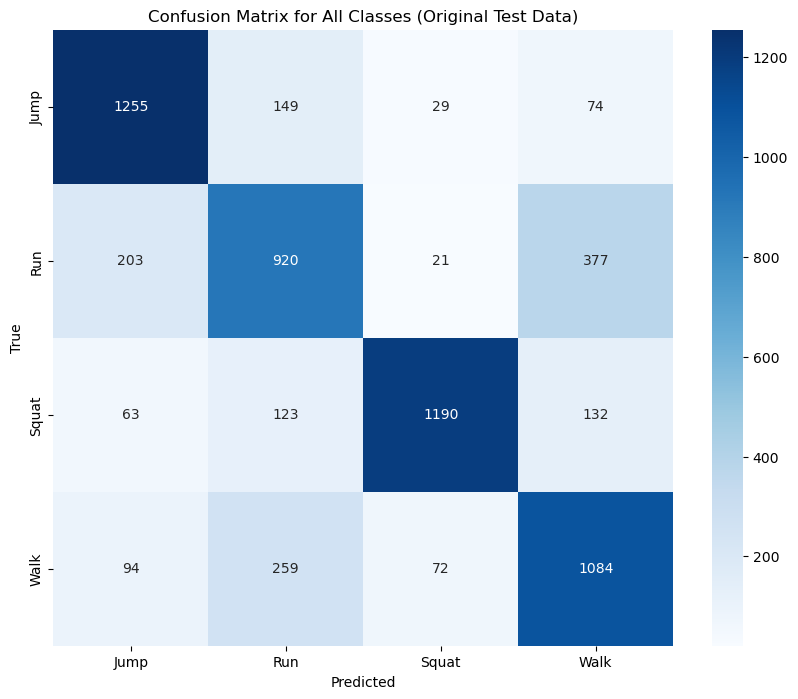

In [18]:
original_test_accuracy_total = 0
best_dt = grid_search.best_estimator_
y_test_total_org_test = []
y_pred_total_org_test = []
for i in range(4):
    test_df = original_test_df_arr[i]
    X_test = test_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]
    y_test = test_df['Class']
    y_pred = best_dt.predict(X_test)
    y_test_total_org_test.extend(y_test)
    y_pred_total_org_test.extend(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    original_test_accuracy_total = original_test_accuracy_total + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Original Test Data): {accuracy}")

cm = confusion_matrix(y_test_total_org_test, y_pred_total_org_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix for All Classes (Original Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
original_test_accuracy_total_avg = original_test_accuracy_total / 4
print(f"Average Accuracy (Original Test Data): {original_test_accuracy_total_avg}")

### Plotting the Decision Tree (Original Data)

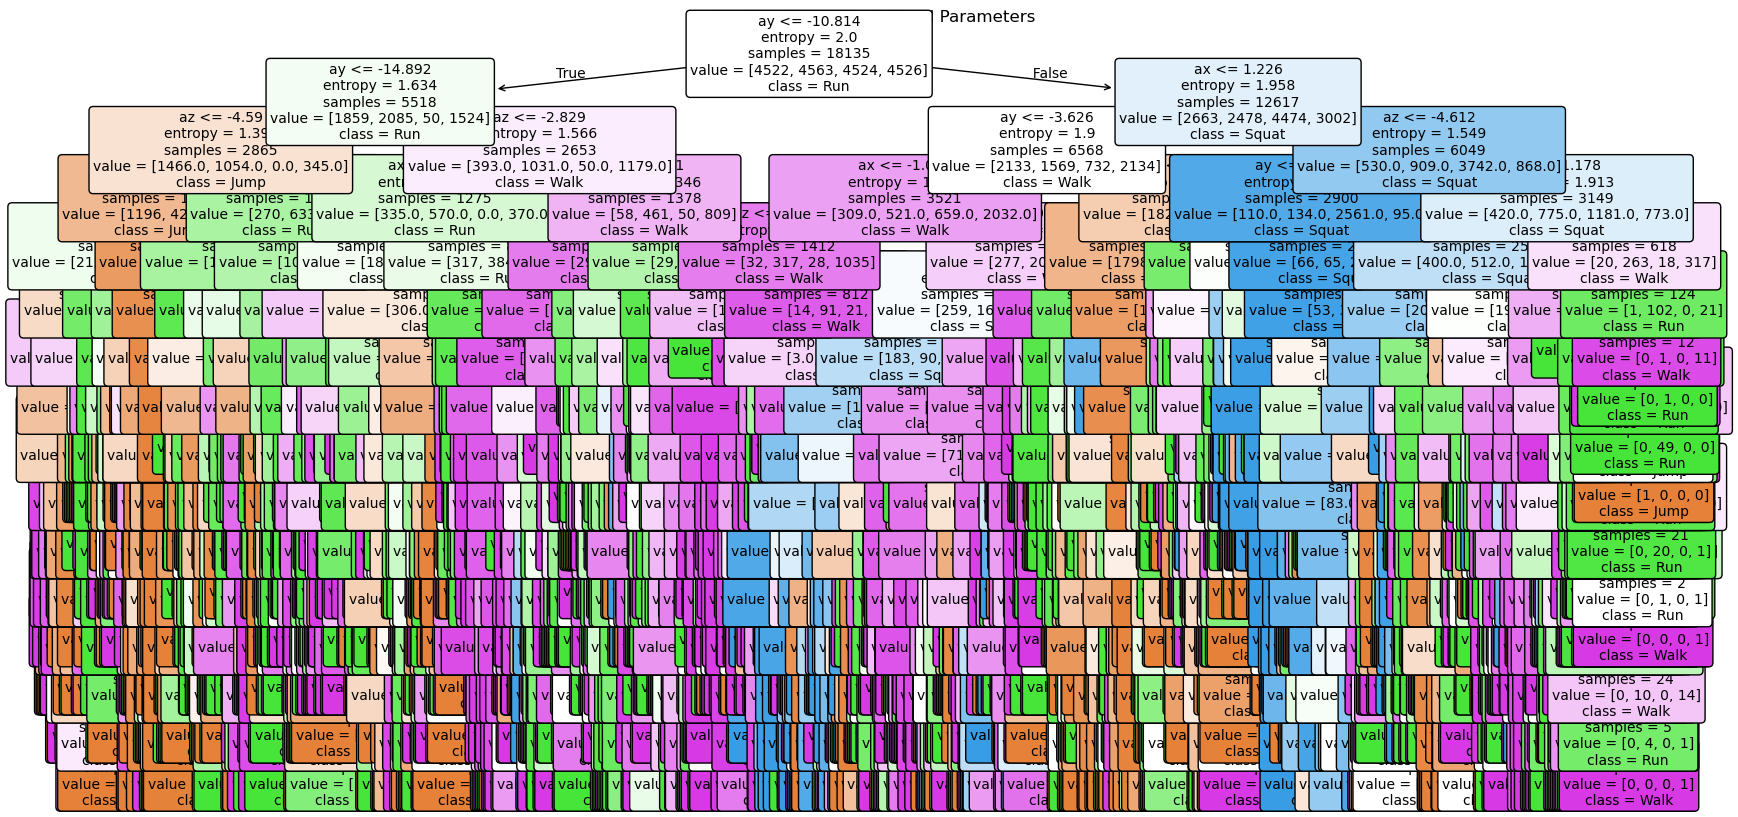

In [19]:
# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree using plot_tree function
plot_tree(best_dt, 
          feature_names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'],  # Feature column names
          class_names=best_dt.classes_,  # Class labels
          filled=True,  # Color nodes by class
          rounded=True,  # Rounded nodes
          fontsize=10)  # Font size

# Display the plot
plt.title('Decision Tree with Optimal Parameters')
plt.show()

### Calculate Accuracy for each test set (Original Validation Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (without normalization) for 'Jump' (Original Validation Data): 0.7619363395225465
Test set accuracy (without normalization) for 'Run' (Original Validation Data): 0.6289473684210526
Test set accuracy (without normalization) for 'Walk' (Original Validation Data): 0.7190192180251822
Test set accuracy (without normalization) for 'Squat' (Original Validation Data): 0.3448275862068966
Average Accuracy (Original Validation Data): 0.6136826280439194


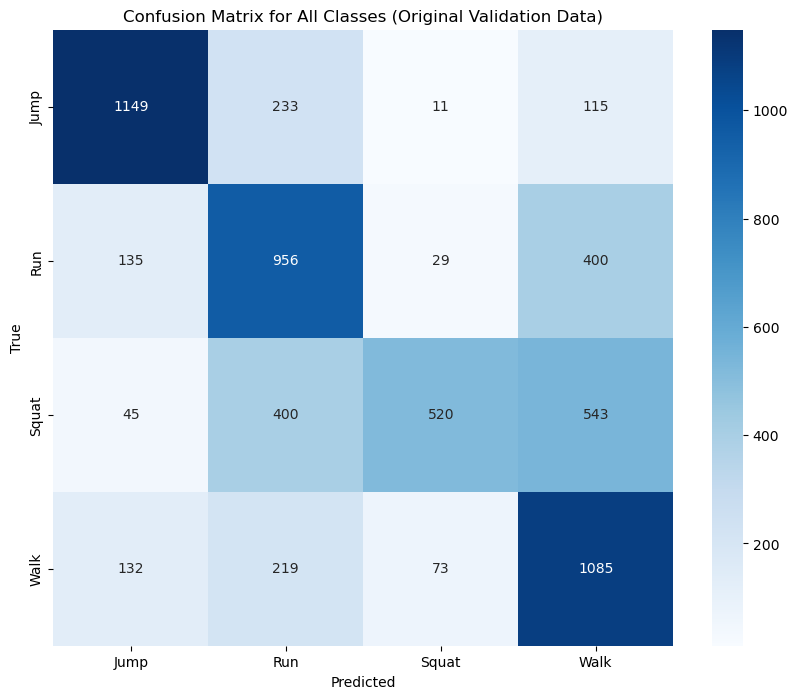

In [20]:
original_validation_accuracy_total = 0
y_test_total_org_validation = []
y_pred_total_org_validation = []
for i in range(4):
    validation_df = original_validation_df_arr[i]
    X_test = validation_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
    y_test = validation_df['Class']  # Label column
    y_pred = best_dt.predict(X_test)
    y_test_total_org_validation.extend(y_test)
    y_pred_total_org_validation.extend(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    original_validation_accuracy_total = original_validation_accuracy_total + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Original Validation Data): {accuracy}")
cm = confusion_matrix(y_test_total_org_validation, y_pred_total_org_validation)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix for All Classes (Original Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
original_validation_accuracy_total_avg = original_validation_accuracy_total / 4
print(f"Average Accuracy (Original Validation Data): {original_validation_accuracy_total_avg}")

# Questions

### Explain the difference between the accuracy for the validation set and the test set

The average accuracy of the test set was higher than the validation set 73.8% vs 61.6% respectively.

Run and Walk had very similar accuracies between the validation set and the test set.

Jump had a moderate drop in accuracy (84.1% to 76.9%)

Squat had a significant drop in accuracy (77.2% to 33.7%)

### Explain the results you see in the confusion matrix

Test data:

Jump had the highest accuracy with most of the data is predicted correctly, and the rest were predicted as Run.

Squat had the second best accuracy with some data predicted incorrectly between Run and Walk

Some data in the Walk class was incorrectly predicted as Run.

Run had the lowest accuracy with some data predicted as Jump and Walk.

Validation Data:

Jump had a good result with some data mispredicted as Run and Walk.

Walk had a good result with some data mispredicted as Run and Jump.

Run had a good result with some data mispredicted as Walk mostly and some as Jump.

Squat performed the worst with more data mispredicted as Walk and Run than the true classification.

# Clean Data

### Train DT Model (Clean Data)

In [21]:
# Create the decision tree classifier object
dt = DecisionTreeClassifier()
# Prepare features and labels for training
X_train = clean_train_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]  # Feature columns
y_train = clean_train_df['Class']  # Label column
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion options
    'max_depth': list(range(1, 21))     # Trying max depths from 1 to 20
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get best estimator
best_dt = grid_search.best_estimator_

# Print the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Print the best model's accuracy score on the training set
best_score = grid_search.best_score_
print(f"Best training accuracy: {best_score}")

Best parameters: {'criterion': 'entropy', 'max_depth': 19}
Best training accuracy: 0.8128407747964175


# Question

### Does the criterion have an impact on the accuracy?

The impact of criterion is insignificant, with a difference of 1.5%

### Calculate Accuracy for each test set (Clean Test Data)
### Calculate confusion matrix
### Calculate Average accuracy

Test set accuracy (without normalization) for 'Jump' (Clean Test Data): 0.837796480489671
Test set accuracy (without normalization) for 'Run' (Clean Test Data): 0.6207418622255867
Test set accuracy (without normalization) for 'Walk' (Clean Test Data): 0.7509549274255156
Test set accuracy (without normalization) for 'Squat' (Clean Test Data): 0.8111620795107034
Average Accuracy (Clean Test Data): 0.7551638374128692


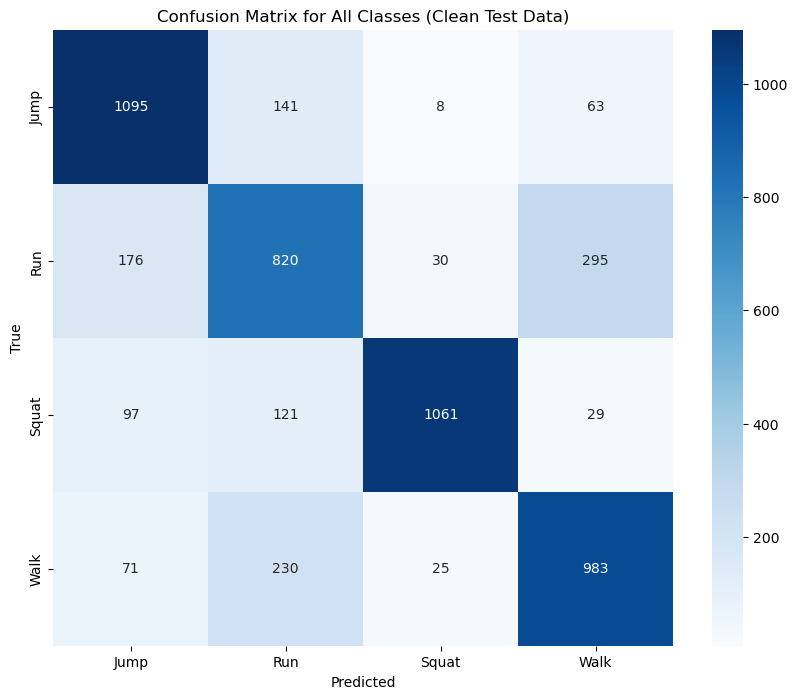

In [22]:
clean_test_accuracy_total = 0
best_dt = grid_search.best_estimator_
y_test_total_clean_test = []
y_pred_total_clean_test = []
for i in range(4):
    test_df = clean_test_df_arr[i]
    X_test = test_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]
    y_test = test_df['Class']
    y_pred = best_dt.predict(X_test)
    y_test_total_clean_test.extend(y_test)
    y_pred_total_clean_test.extend(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    clean_test_accuracy_total = clean_test_accuracy_total + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Clean Test Data): {accuracy}")

cm = confusion_matrix(y_test_total_clean_test, y_pred_total_clean_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix for All Classes (Clean Test Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
clean_test_accuracy_total_avg = clean_test_accuracy_total / 4
print(f"Average Accuracy (Clean Test Data): {clean_test_accuracy_total_avg}")

### Plotting the Decision Tree (Clean Data)

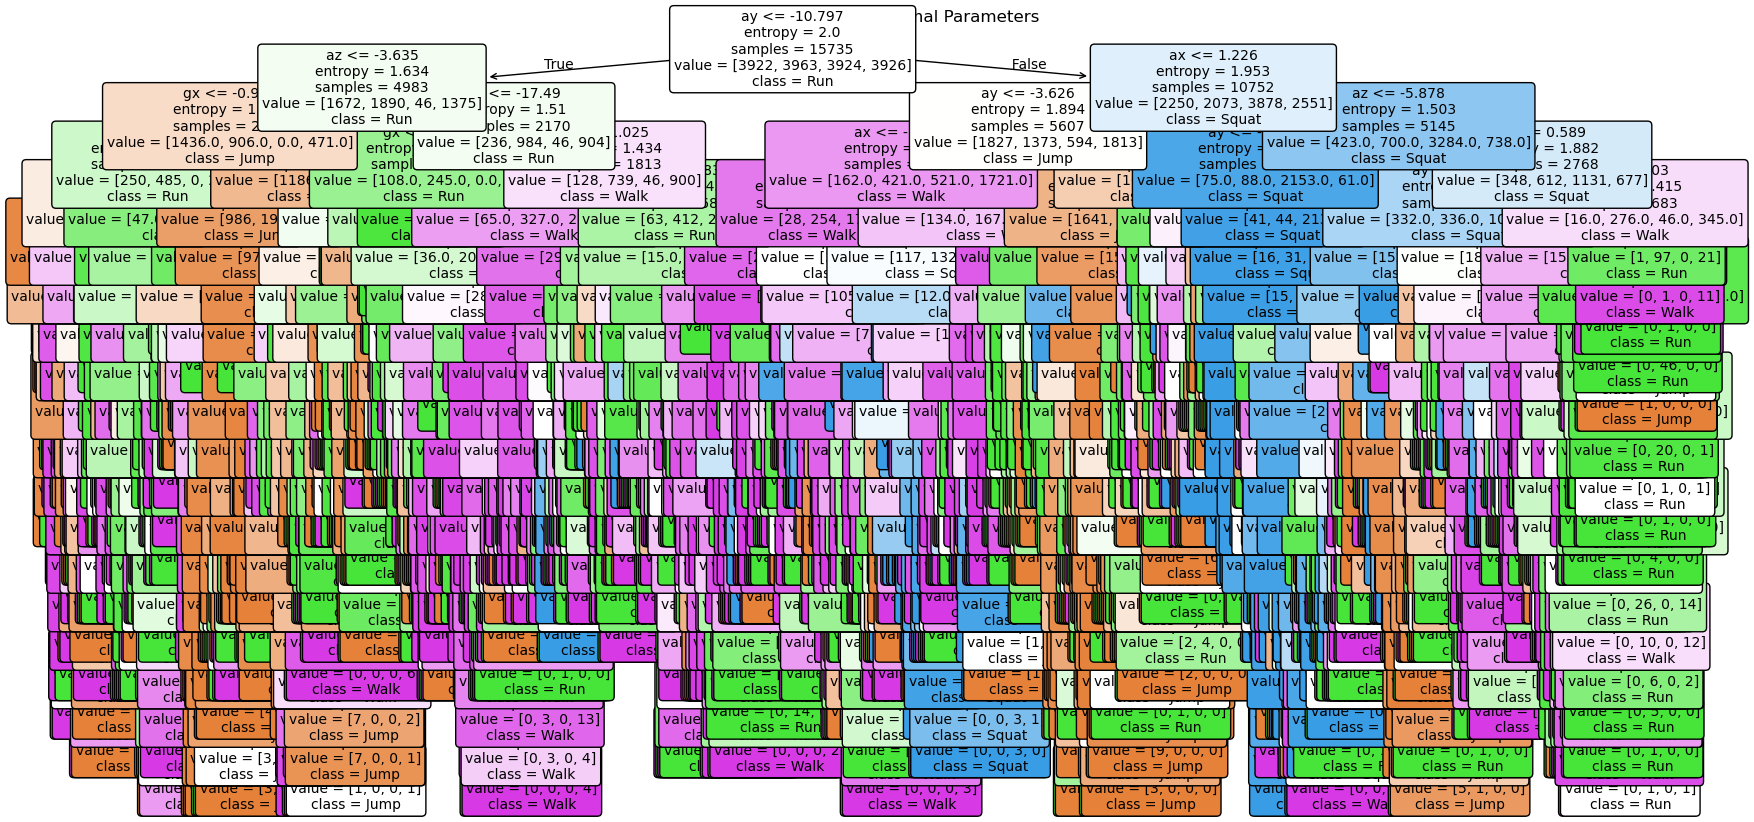

In [23]:
# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree using plot_tree function
plot_tree(best_dt, 
          feature_names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'],  # Feature column names
          class_names=best_dt.classes_,  # Class labels
          filled=True,  # Color nodes by class
          rounded=True,  # Rounded nodes
          fontsize=10)  # Font size

# Display the plot
plt.title('Decision Tree with Optimal Parameters')
plt.show()

Test set accuracy (without normalization) for 'Jump' (Clean Validation Data): 0.7714067278287462
Test set accuracy (without normalization) for 'Run' (Clean Validation Data): 0.6227272727272727
Test set accuracy (without normalization) for 'Walk' (Clean Validation Data): 0.7272727272727273
Test set accuracy (without normalization) for 'Squat' (Clean Validation Data): 0.3318042813455658
Average Accuracy (Clean Validation Data): 0.613302752293578


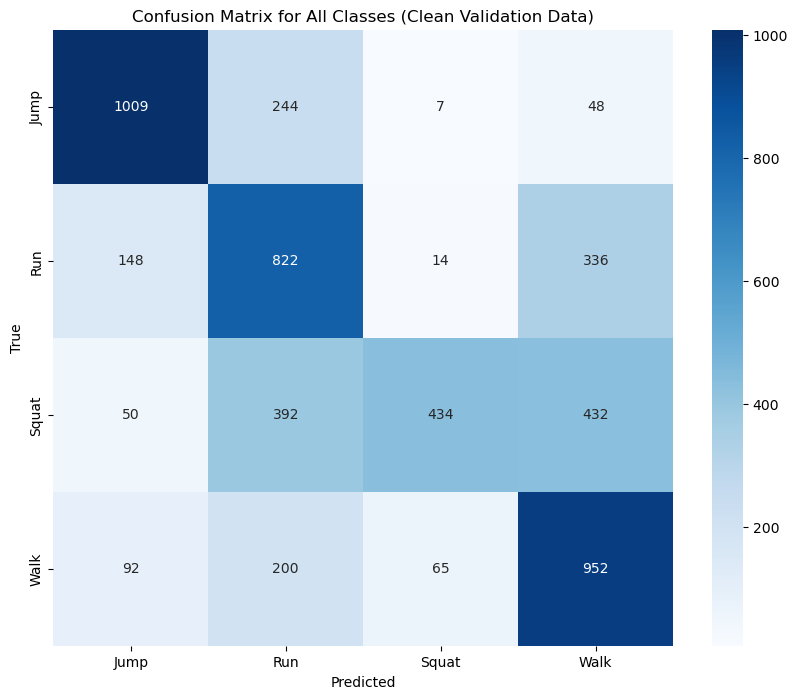

In [24]:
clean_validation_accuracy_total = 0
best_dt = grid_search.best_estimator_
y_test_total_clean_validation = []
y_pred_total_clean_validation = []
for i in range(4):
    validation_df = clean_validation_df_arr[i]
    X_test = validation_df[['ax', 'ay', 'az', 'gx', 'gy', 'gz']]
    y_test = validation_df['Class']
    y_pred = best_dt.predict(X_test)
    y_test_total_clean_validation.extend(y_test)
    y_pred_total_clean_validation.extend(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    clean_validation_accuracy_total = clean_validation_accuracy_total + accuracy
    print(f"Test set accuracy (without normalization) for '{classes[i]}' (Clean Validation Data): {accuracy}")

cm = confusion_matrix(y_test_total_clean_validation, y_pred_total_clean_validation)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix for All Classes (Clean Validation Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
clean_validation_accuracy_total_avg = clean_validation_accuracy_total / 4
print(f"Average Accuracy (Clean Validation Data): {clean_validation_accuracy_total_avg}")

# Questions

### Explain the difference between the accuracy for the validation set and the test set

The average accuracy of the test set was higher than the validation set 81.3% vs 60.8% respectively.

Run and Walk had very similar accuracies between the validation set and the test set.

Jump had a moderate drop in accuracy (85.2% to 78.5%)

Squat had a significant drop in accuracy (81.7% to 29.1%)

### Explain the results you see in the confusion matrix

Test data:

Jump had the highest accuracy with most of the data is predicted correctly, and the rest were predicted as Run.

Squat had the second best accuracy with some data predicted incorrectly as Run

Some data in the Walk class was incorrectly predicted as Run.

Run had the lowest accuracy with some data predicted as Jump and Walk.

Validation Data:

Jump had good results with some data mispredicted as Run.

Walk had good results with some data mispredicteed as Run.

Run had a moderate result with a lot of the data mispredicted as Jump and Walk, but mostly Walk.

Squat had the worst result with most of the data predicted as Run or Walk and not Squat.

# Question: kNN vs Decision Tree

# What is the difference between the accuracies?
knn:

original 83.1%

clean 86.2%

original test avg 80.9%

clean test avg 83.4%

original validation avg 67.7%

clean validation avg 71.2%

dt: 

original 79.6%

clean 81.4%

original test avg 73.8%

clean test avg 76.1%

original validation avg 61.6%

clean validation avg 60.7%

kNN model vs DT model best accuracy on the training set was a difference of 3.5% on the original data and 4.8% on the clean data in favor of kNN.

On the test set, kNN had 7.1-7.3% higher accuracy than the Decision Tree model.

On the validation set, kNN had 6.1-10.5% higher accuracy than the Decision Tree model.

kNN model performed significantly better than the decision tree model.

### What is the difference between the confusion matrices?
kNN had less incorrect predicitions of classifications across all tests.

The decision tree performed very poorly classifying the Squat movement which had the lowest accuracy of all at 29.1%.

kNN had a higher average across all tests and the lowest accuracy was at 61.3% for the Run.